In [1]:
# # Setup access to my Google Drive
# from google.colab import drive
# drive.mount('/content/drive',  force_remount=False)

# # Set the working directory
# import os
# os.chdir('/content/drive/MyDrive/ViT_myWorks/')
# import warnings
# warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
# !pip install -q torchmetrics
# !pip install --upgrade pytorch-pretrained-vit
# !pip install efficientnet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-pretrained-vit: filename=pytorch_pretrained_vit-0.0.7-py3-none-any.whl size=11116 sha256=c6236ae4524acb3beb782ca9f4ccc16b944ba9a50a87459bf58ec729779957e1
  Stored in directory: /root/.cache/pip/wheels/2d/46/ad/12007be9d377d0fbf27ef75b6e47ed92832ab6b70dbf004b6f
Successfully built pytorch-pretrained-vit
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=eefafca052939477f01b1f650aeee082760ca6b01ebbe59ce6ca9a10a01d09e5
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [9]:
import torch
import pandas as pd
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
from resViT.model import *
from resViT.train import *
from resViT.loaddata import *
from sklearn.svm import SVC
import scipy.io as sio

In [2]:
root_path = './cwruData/' #running from local
tarData = ['FE_tar_7_1', 'FE_tar_7_2', 'FE_tar_7_3', 'FE_tar_14_1', 'FE_tar_14_2',
           'FE_tar_14_3', 'FE_tar_21_1', 'FE_tar_21_2', 'FE_tar_21_3', 'ims_tar'];
class_names = ['N', 'IR', 'B', 'OR']

Validation Accuracy =  99.6875
__________________________________________________
Pricision Score = 0.9969135802469136
__________________________________________________
F_1 Score =  0.9968944099378882
__________________________________________________
Recall Score =  0.9969135802469136
__________________________________________________
Response time per batch 0.8638534545898438
Validation Accuracy =  99.6875
__________________________________________________
Pricision Score = 0.996875
__________________________________________________
F_1 Score =  0.9968939306246865
__________________________________________________
Recall Score =  0.9969512195121951
__________________________________________________
Response time per batch 0.8151931762695312
Validation Accuracy =  100.0
__________________________________________________
Pricision Score = 1.0
__________________________________________________
F_1 Score =  1.0
__________________________________________________
Recall Score =  1.0
_____

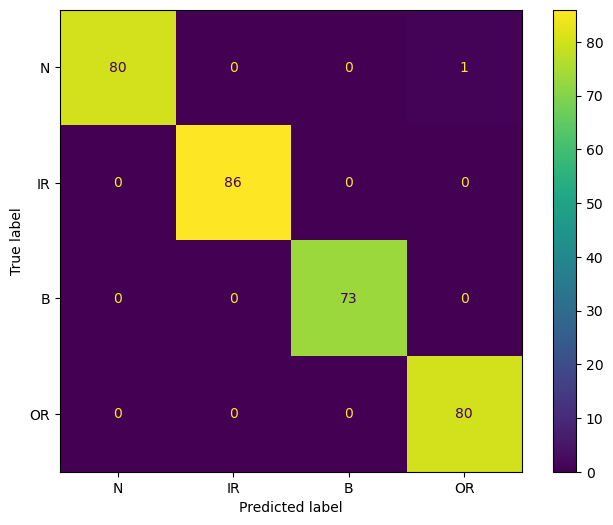

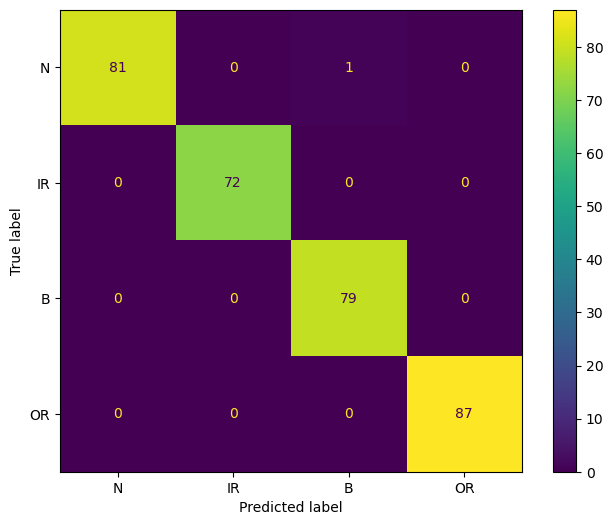

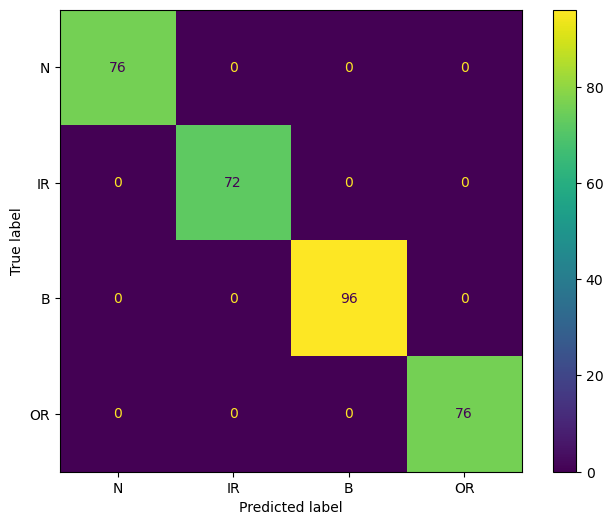

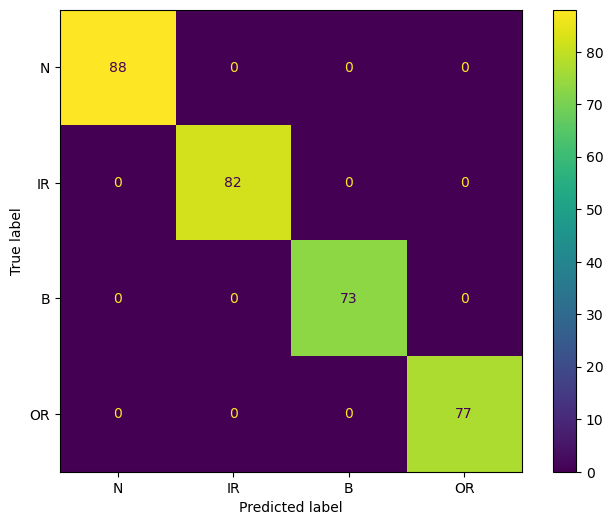

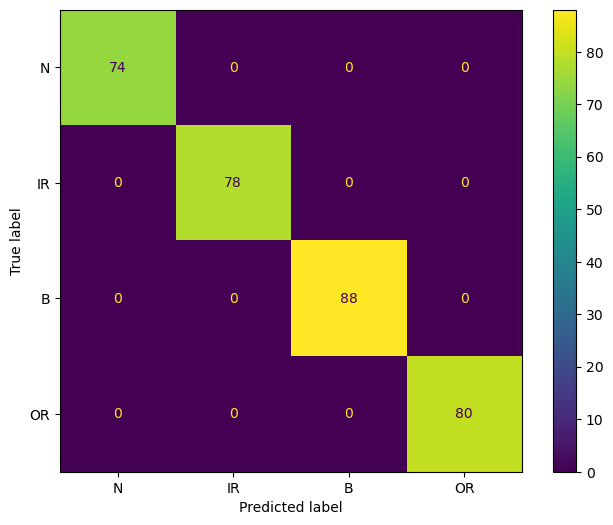

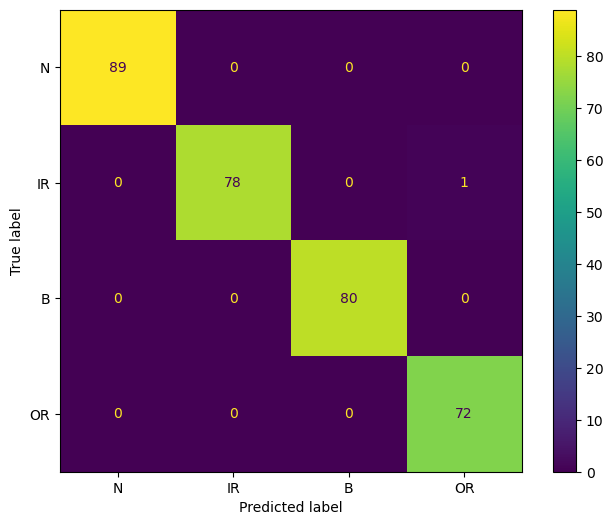

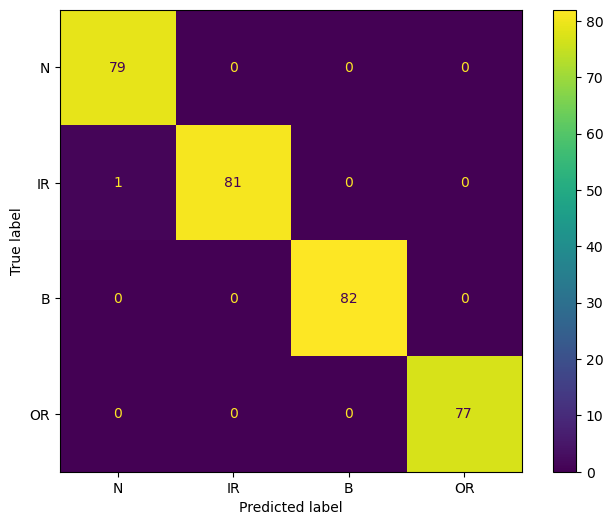

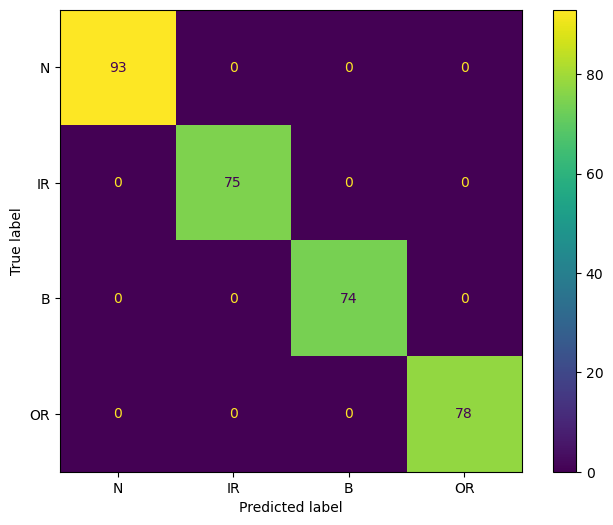

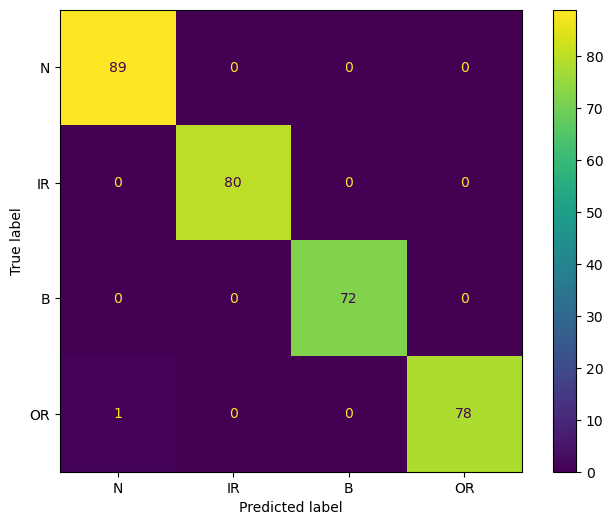

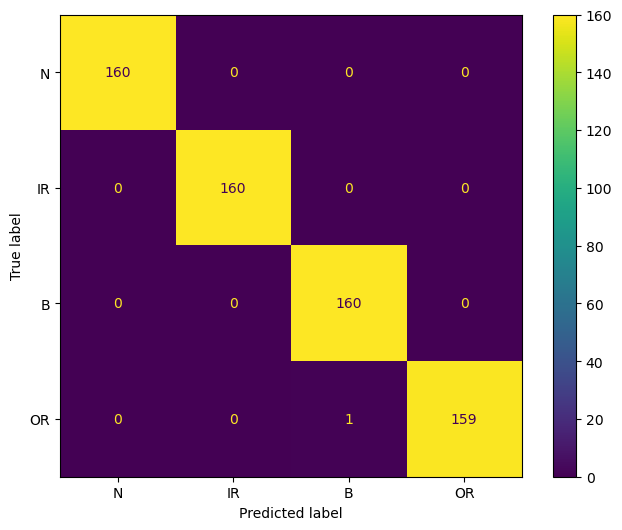

In [3]:
# Validate and Visualize
perfvit = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
for name in tarData:
    Model = torch.load('./saved_models/ViT_'+ name + '.pth', map_location=device)
    _, TestLoader, _, numClass = loaddata(root_path, name)
    val_acc, cm, prec, f1, recall, time_batch = validate_pr(Model, TestLoader, numClass)
    print('Validation Accuracy = ', 100*val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)

    perfvit = pd.concat((perfvit, pd.DataFrame({name : [100*val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

# Train benchmark models for comparisions
## Models: EfficientNet, ResNeXt, DenseNet, VGGNet, GoogleNet, SqeezeNet

### PreTrained Standard ViT with 12 encoder blocks

Validation Accuracy =  98.75
__________________________________________________
Pricision Score = 0.9878783426388481
__________________________________________________
F_1 Score =  0.9868225462379819
__________________________________________________
Recall Score =  0.9863013698630136
__________________________________________________
Response time per batch
 0.009550094604492188
Validation Accuracy =  98.75
__________________________________________________
Pricision Score = 0.987386689118186
__________________________________________________
F_1 Score =  0.9876588738172997
__________________________________________________
Recall Score =  0.9880395361133881
__________________________________________________
Response time per batch
 0.009018182754516602
Validation Accuracy =  99.6875
__________________________________________________
Pricision Score = 0.9965753424657534
__________________________________________________
F_1 Score =  0.9966202329298928
_________________________________

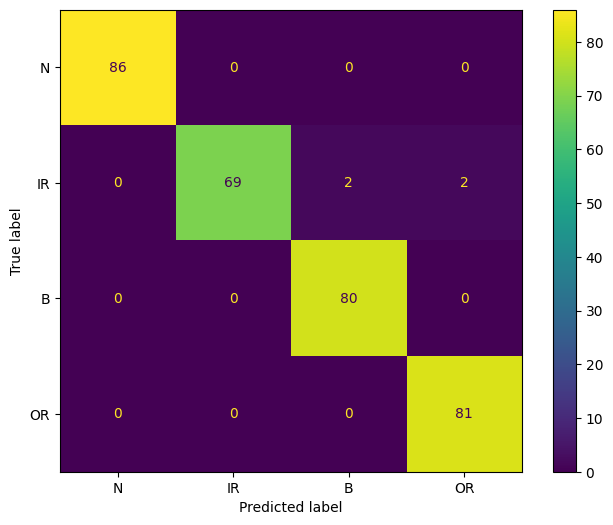

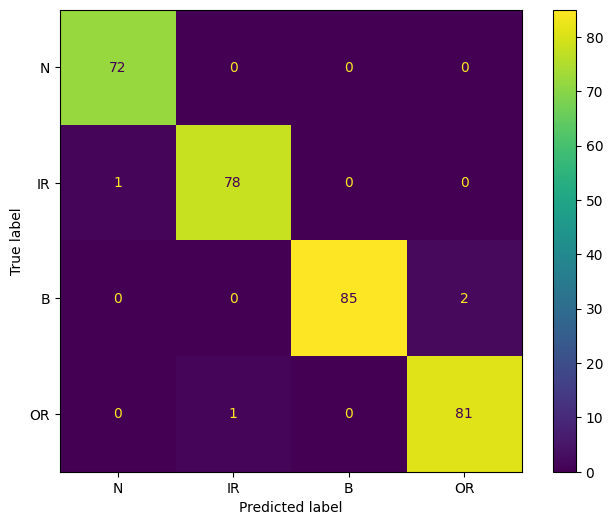

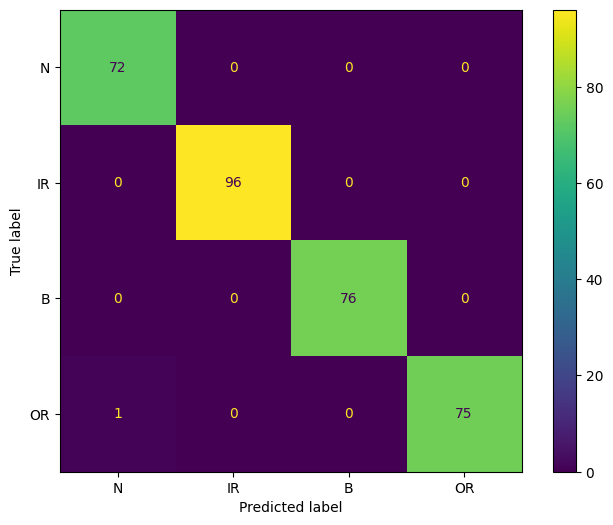

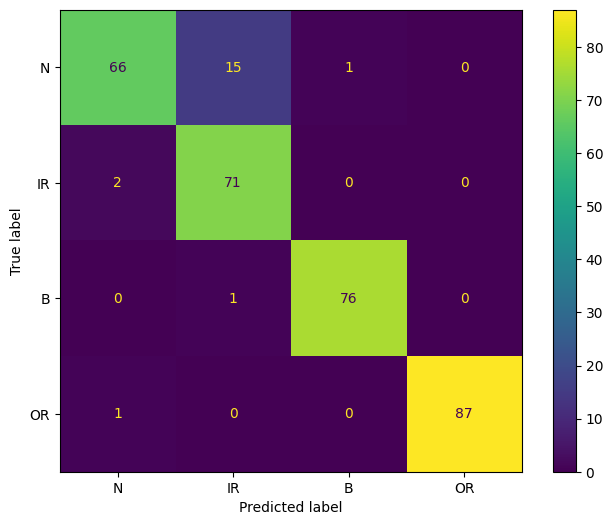

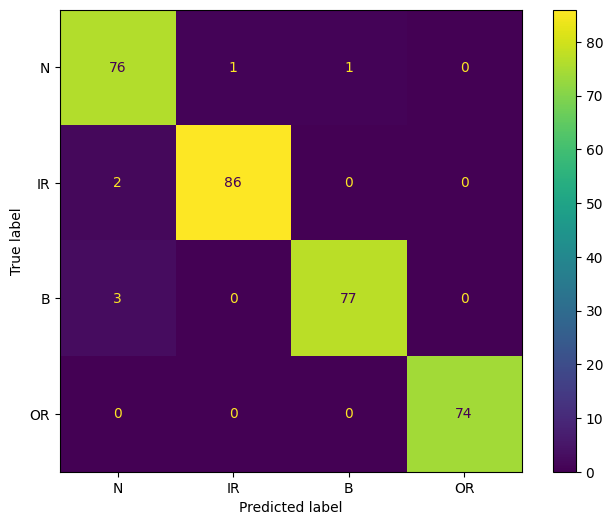

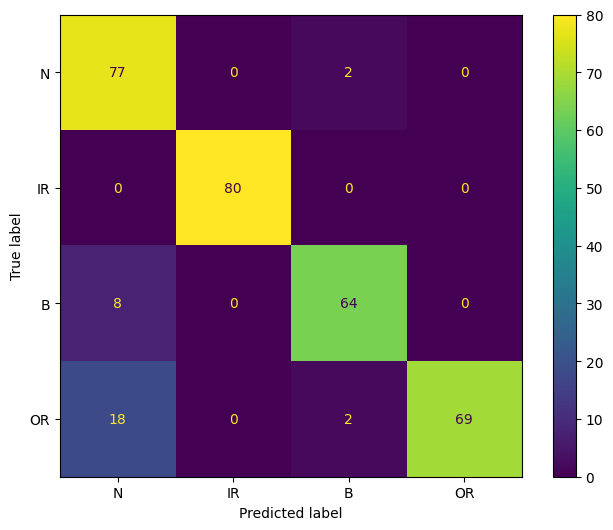

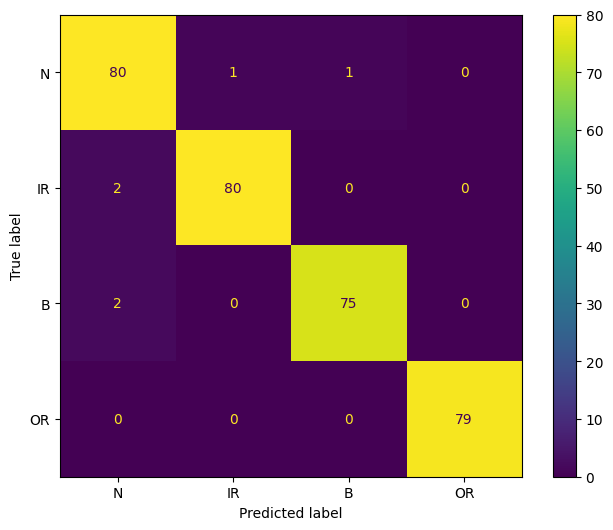

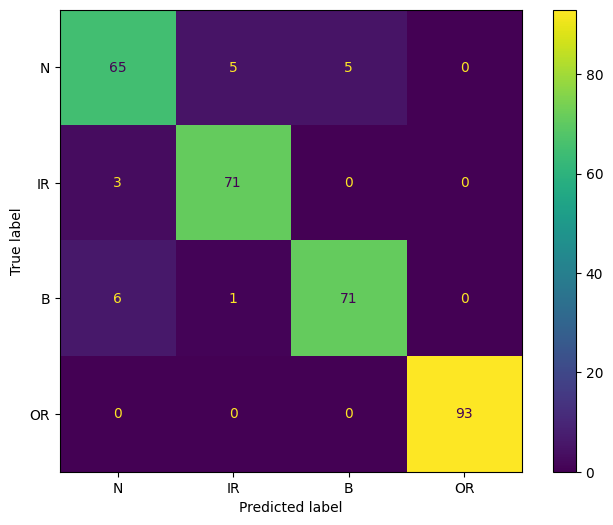

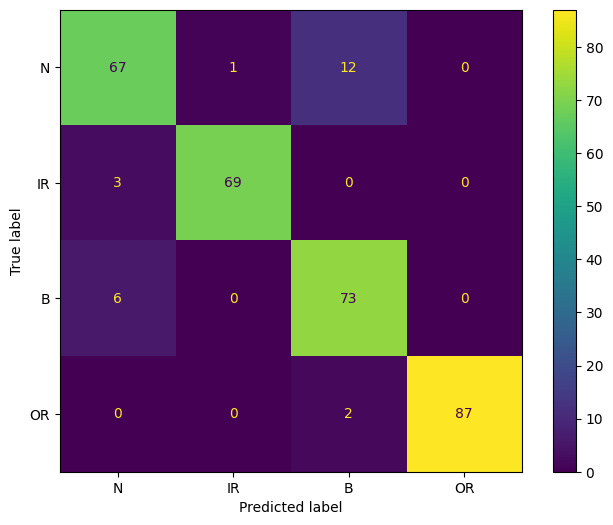

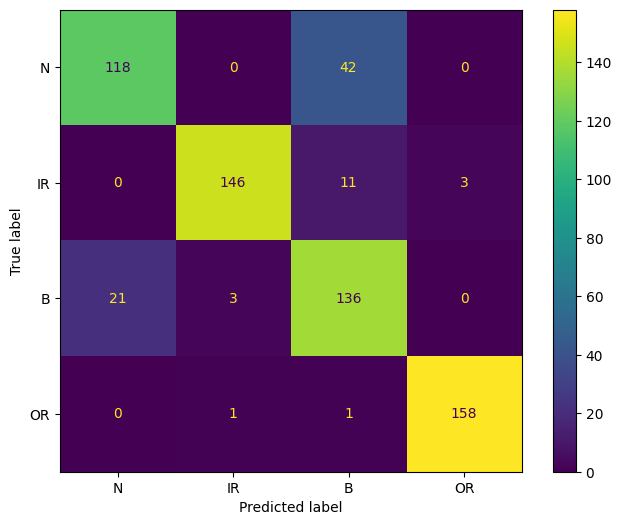

In [5]:
# Validate and Visualize
# Validate and Visualize
perfvit_pre = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
for name in tarData:
    Model = torch.load('./saved_models/ViT_pre_'+ name +'.pth', map_location=device)
    _, TestLoader, _, numClass = loaddata(root_path, name)
    val_acc, cm, prec, f1, recall, time_batch = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch\n', time_batch)
    disp_conf_matrix(cm, class_names)

    perfvit_pre = pd.concat((perfvit_pre, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
    perfvit_pre.to_csv('perfvit_pre.csv')

In [66]:
perfvit_pre = pd.read_csv('./results/perfvit_pre.csv')
perfvit_pre = perfvit_pre.drop(('Unnamed: 0'), axis = 1)
perfvit_pre.columns = pd.RangeIndex(start=0, stop=11, step=1)
perfvit_pre

,0,1,2,3,4,5,6,7,8,9,10
0,Val Acc.,98.750000,98.750000,99.687500,93.750000,97.812500,90.625000,98.125000,93.750000,92.500000,87.187500
1,Precision,0.987878,0.987387,0.996575,0.939907,0.978489,0.922187,0.981719,0.933667,0.926593,0.879853
2,F1_score,0.986823,0.987659,0.996620,0.935743,0.978379,0.908464,0.981461,0.933740,0.924740,0.873200
3,Recall,0.986301,0.988040,0.996711,0.938283,0.978533,0.909713,0.981311,0.934096,0.924353,0.871875


### EfficientNet

Validation Accuracy =  98.4375
__________________________________________________
Pricision Score = 0.9843060070971718
__________________________________________________
F_1 Score =  0.9836083852520756
__________________________________________________
Recall Score =  0.9832149501099272
__________________________________________________
Response time per batch
 0.25800108909606934
Validation Accuracy =  97.1875
__________________________________________________
Pricision Score = 0.9736956521739131
__________________________________________________
F_1 Score =  0.9724210779732793
__________________________________________________
Recall Score =  0.9723888634565089
__________________________________________________
Response time per batch
 0.25063419342041016
Validation Accuracy =  98.4375
__________________________________________________
Pricision Score = 0.9831981981981982
__________________________________________________
F_1 Score =  0.9832169100970698
______________________________

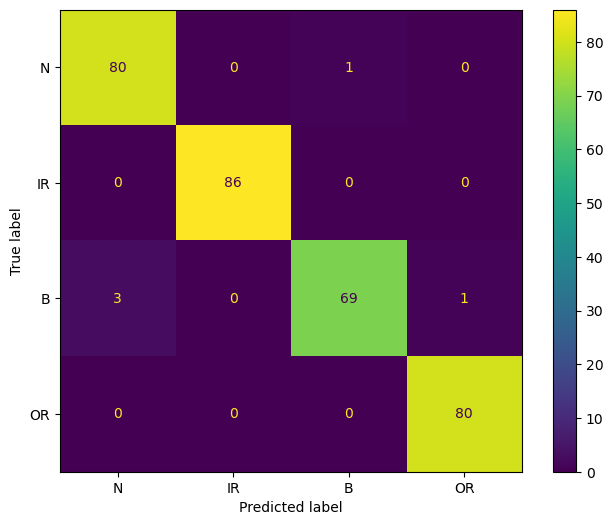

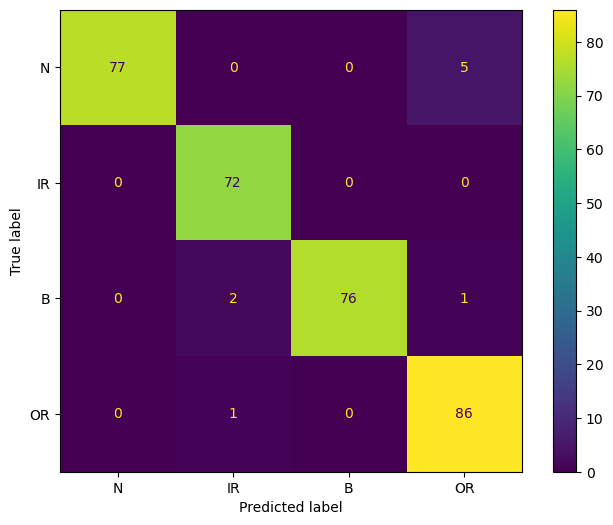

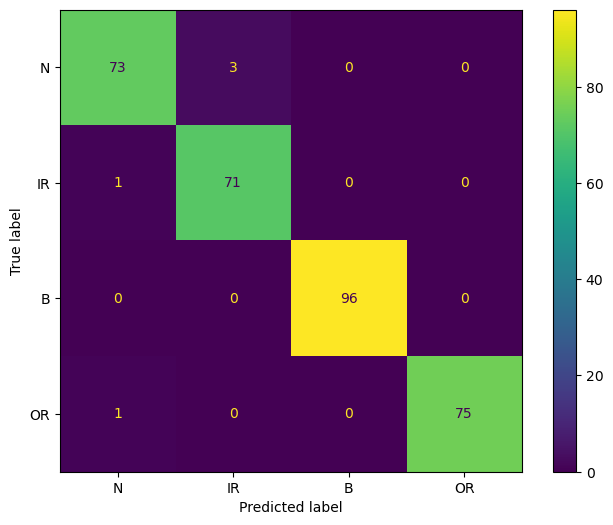

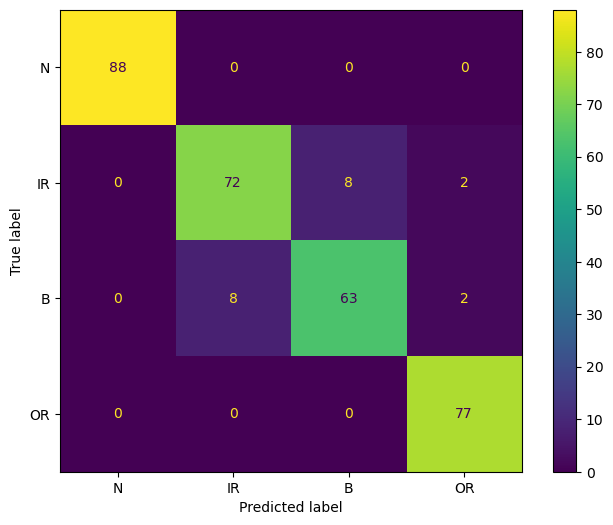

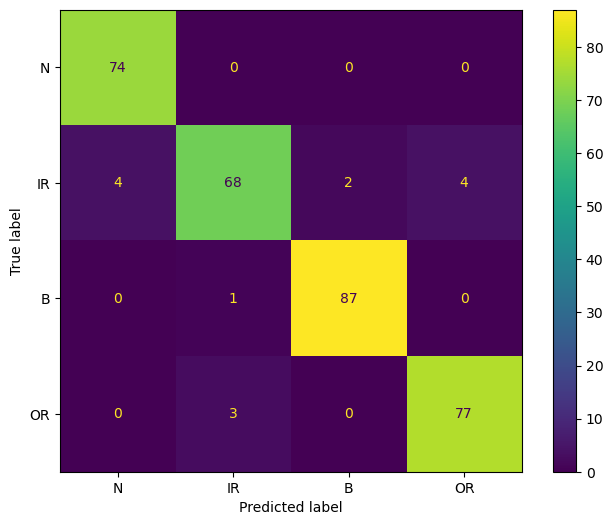

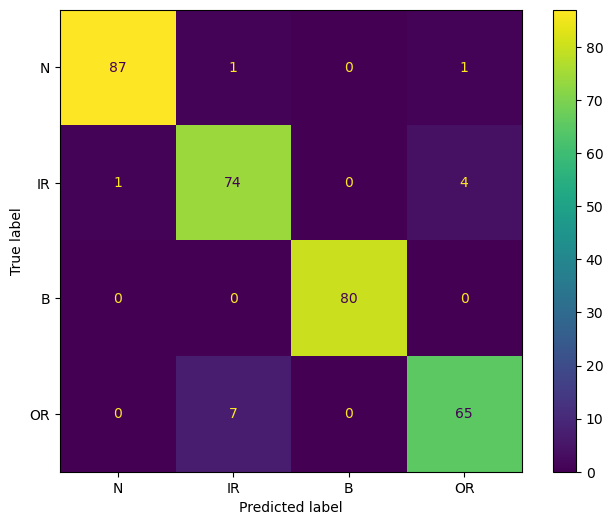

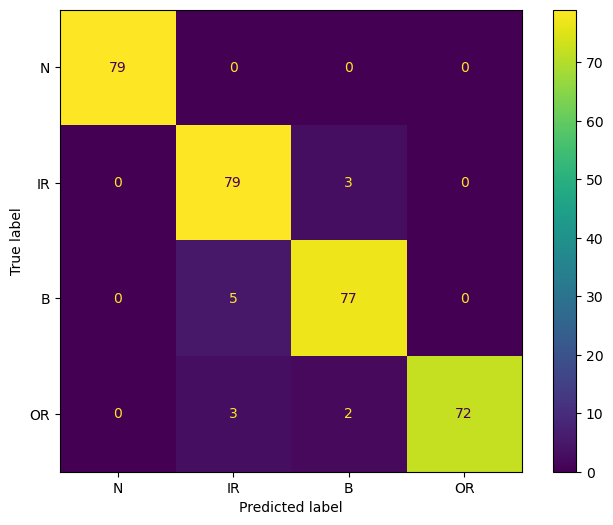

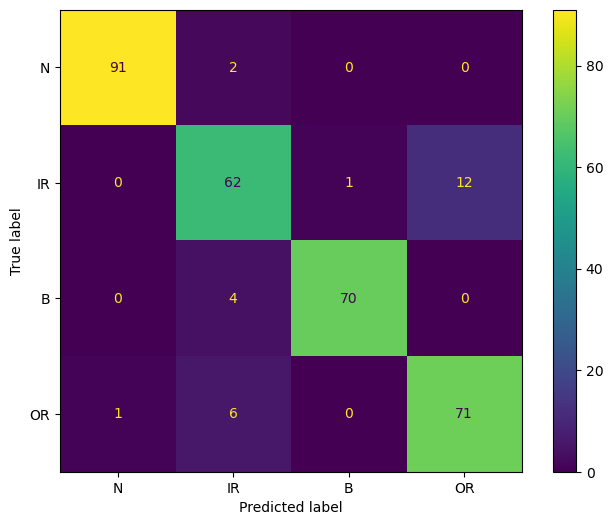

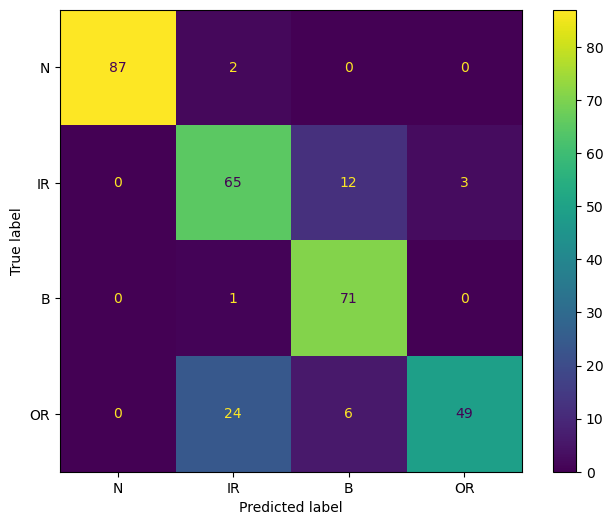

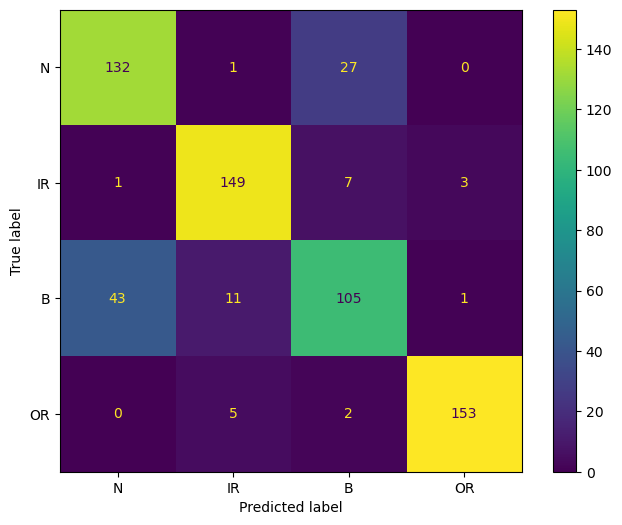

In [5]:
# Validate and Visualize
perfEffNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
for name in tarData:
    Model = torch.load('./saved_models/efficient_'+ name +'.pth', map_location=device)
    _, TestLoader, _, numClass = loaddata(root_path, name)
    val_acc, cm, prec, f1, recall, time_batch = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch\n', time_batch)
    disp_conf_matrix(cm, class_names)

    perfEffNet = pd.concat((perfEffNet, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

### ResNeXt

Validation Accuracy =  98.75
__________________________________________________
Pricision Score = 0.9874427286611234
__________________________________________________
F_1 Score =  0.9869579945799458
__________________________________________________
Recall Score =  0.9866396076441738
__________________________________________________
Response time per batch 0.40169382095336914
Validation Accuracy =  98.4375
__________________________________________________
Pricision Score = 0.985885989010989
__________________________________________________
F_1 Score =  0.9848114436796332
__________________________________________________
Recall Score =  0.9843326558265583
__________________________________________________
Response time per batch 0.4459347724914551
Validation Accuracy =  99.375
__________________________________________________
Pricision Score = 0.9932432432432432
__________________________________________________
F_1 Score =  0.9932640841876077
_____________________________________

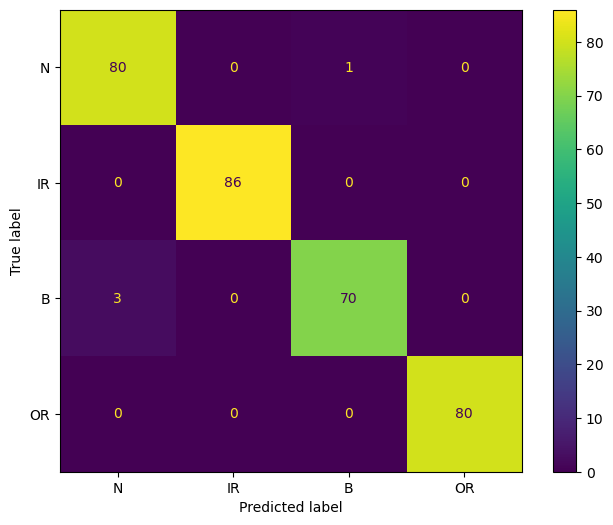

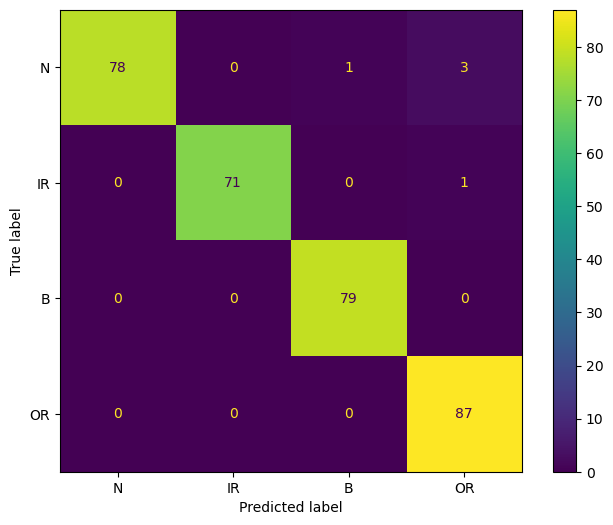

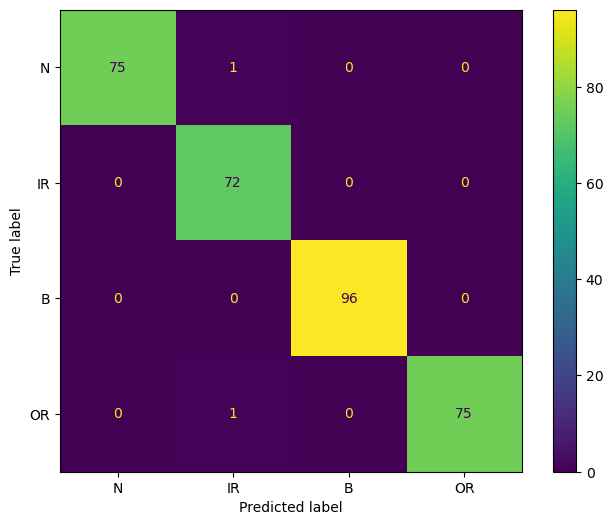

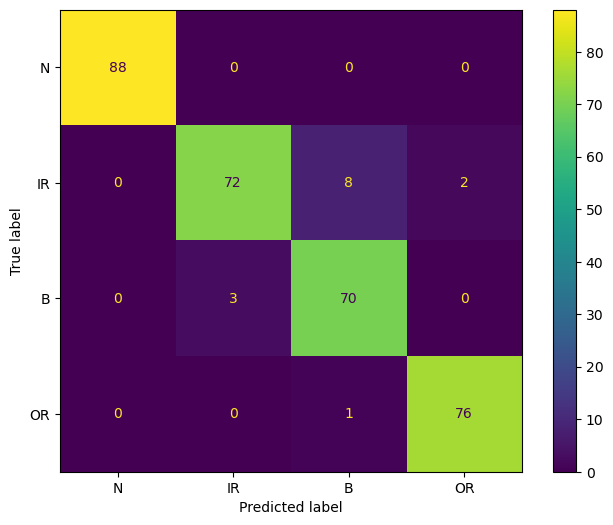

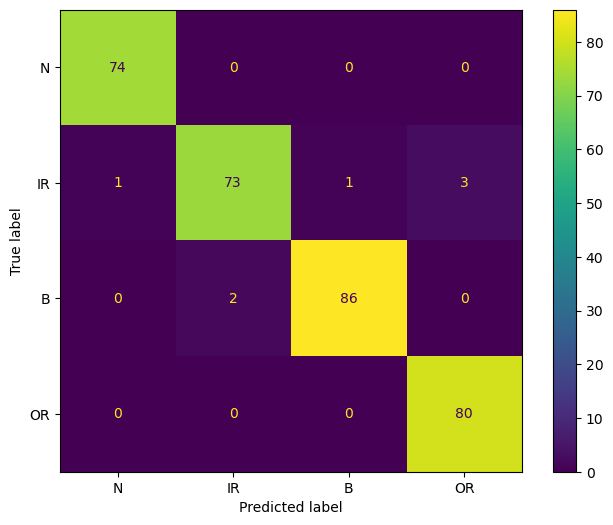

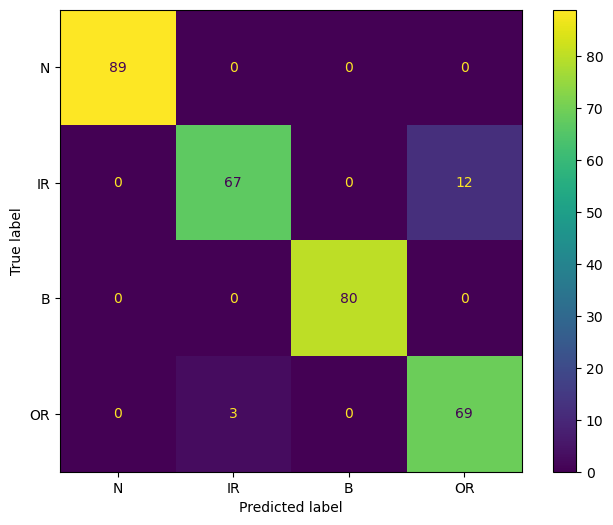

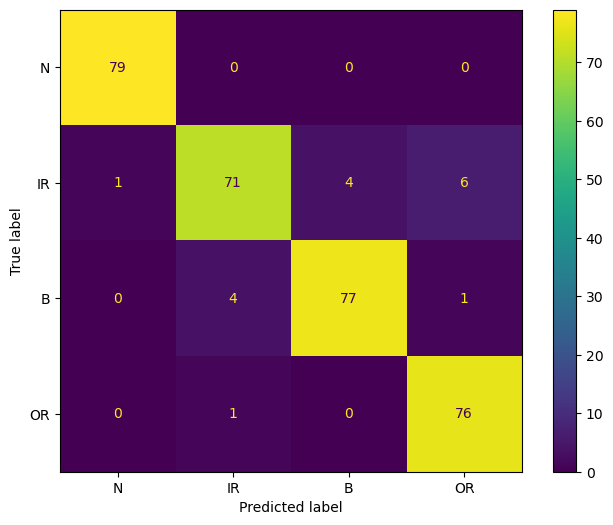

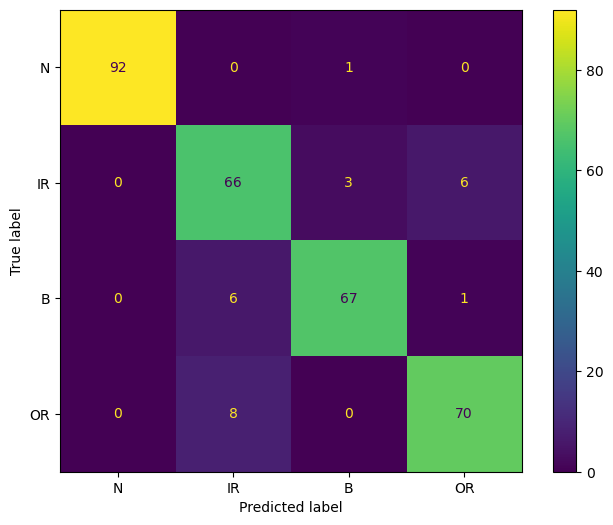

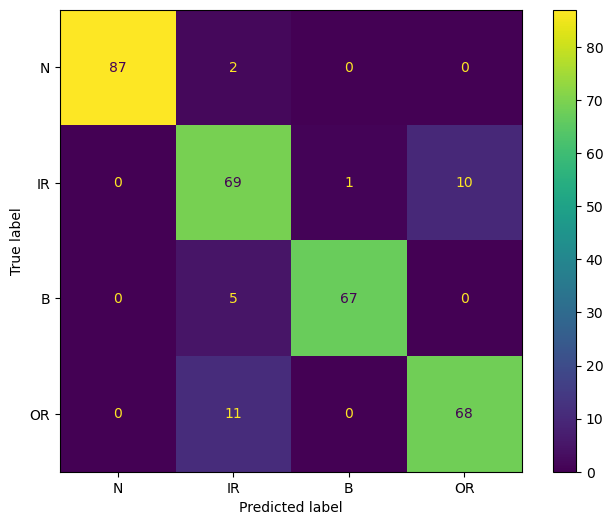

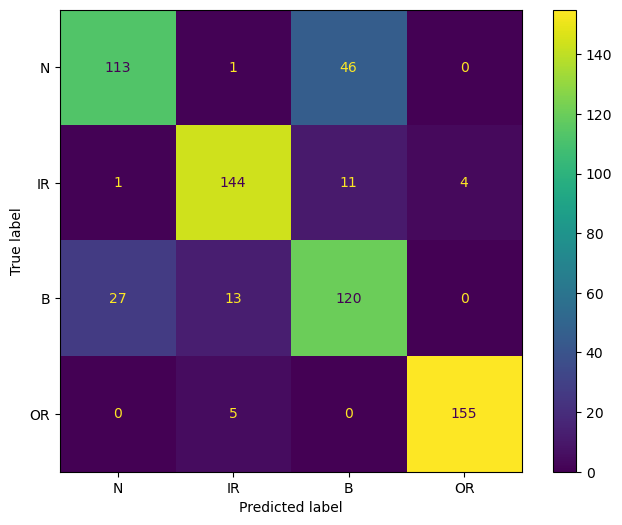

In [6]:
# Validate and Visualize
perfResNeXt = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
for name in tarData:
    _, TestLoader, _, numClass = loaddata(root_path, name)
    Model = torch.load('./saved_models/ResNeXt_'+ name +'.pth', map_location=device)
    val_acc, cm, prec, f1, recall, time_batch = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    perfResNeXt = pd.concat((perfResNeXt, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

### DenseNet

Validation Accuracy =  98.125
__________________________________________________
Pricision Score = 0.9803896076441738
__________________________________________________
F_1 Score =  0.9804092572109249
__________________________________________________
Recall Score =  0.9804667681380009
__________________________________________________
Response time per batch 0.30622434616088867
Validation Accuracy =  99.375
__________________________________________________
Pricision Score = 0.9932432432432432
__________________________________________________
F_1 Score =  0.9935378990726531
__________________________________________________
Recall Score =  0.9939618798195838
__________________________________________________
Response time per batch 0.3320789337158203
Validation Accuracy =  98.75
__________________________________________________
Pricision Score = 0.9868421052631579
__________________________________________________
F_1 Score =  0.9865540570571905
_____________________________________

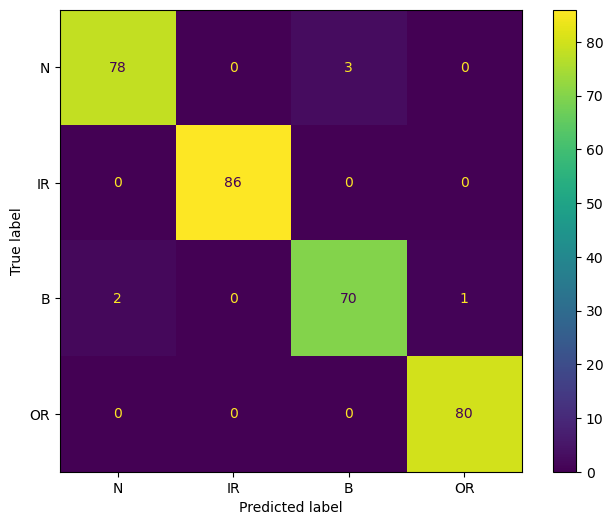

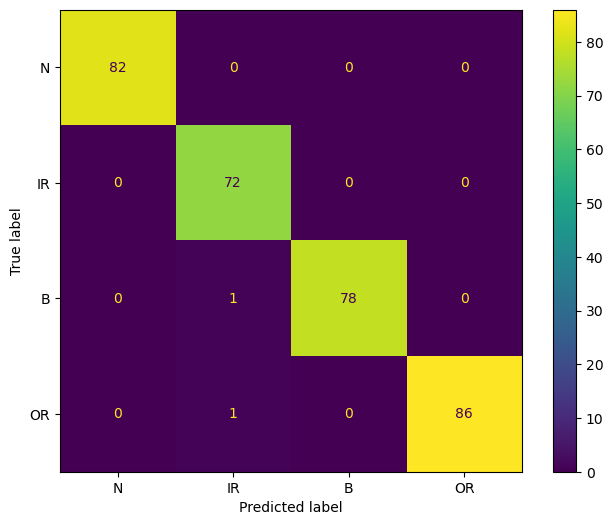

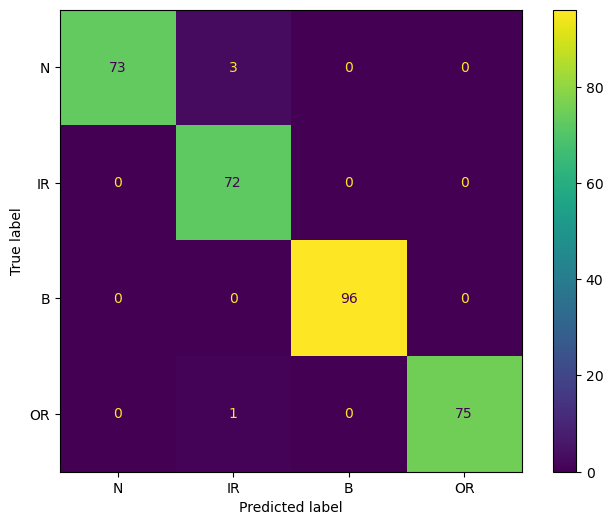

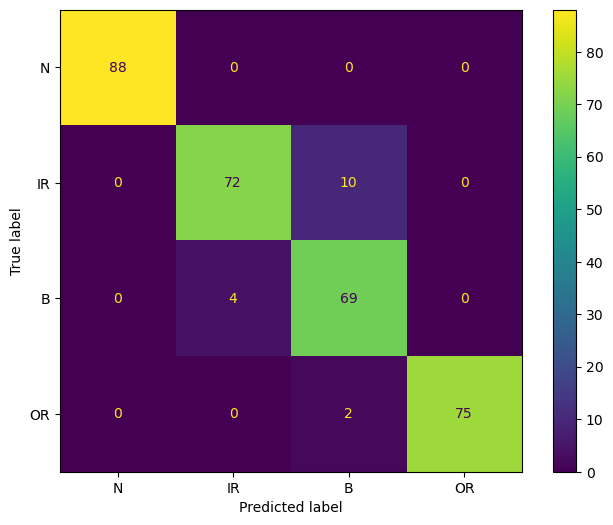

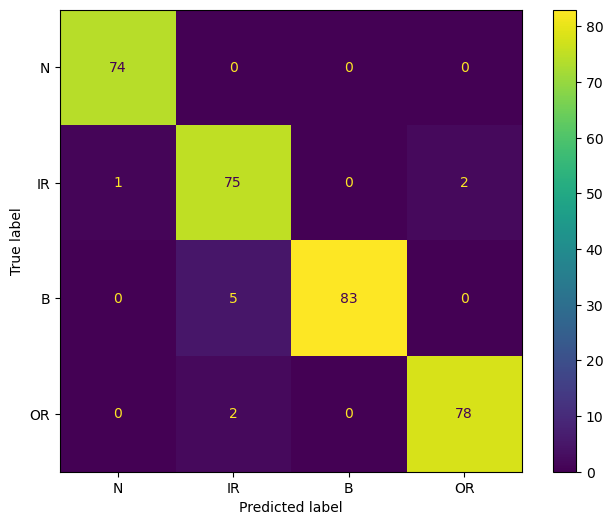

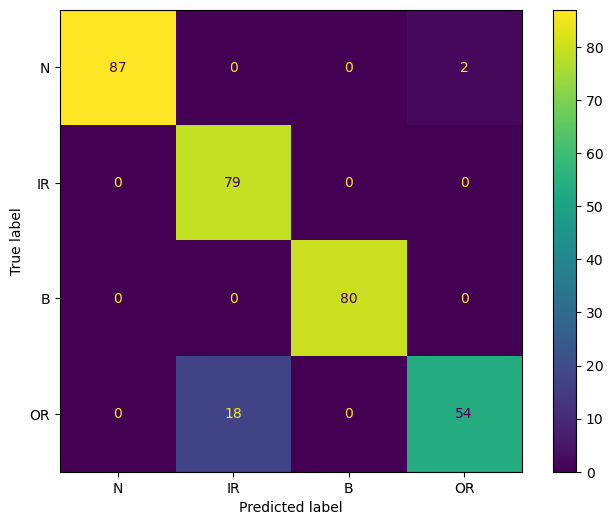

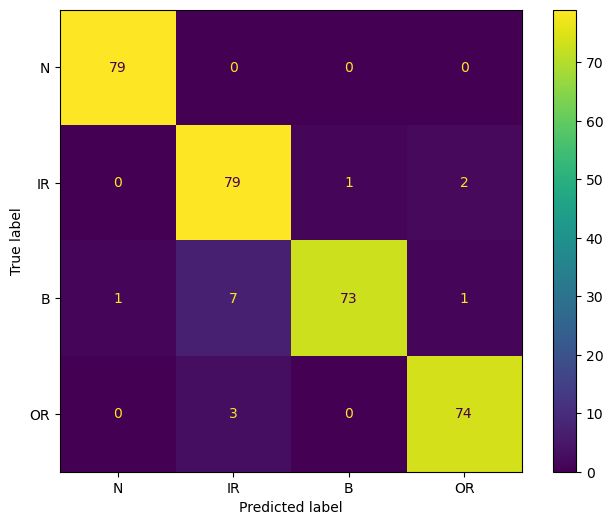

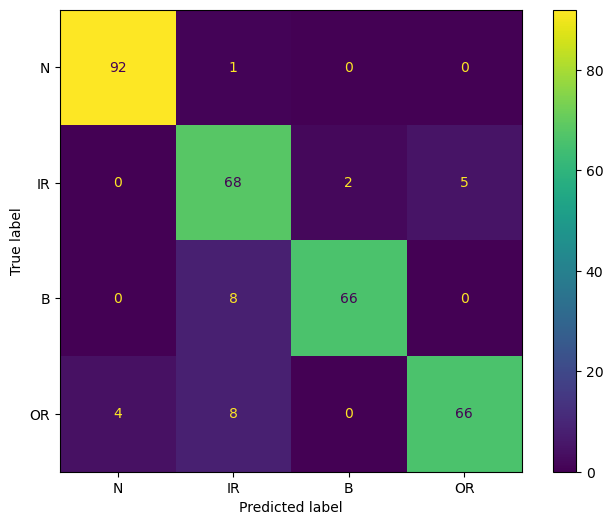

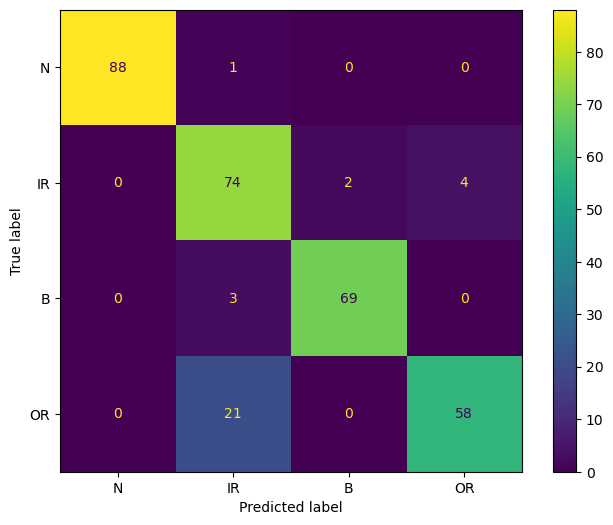

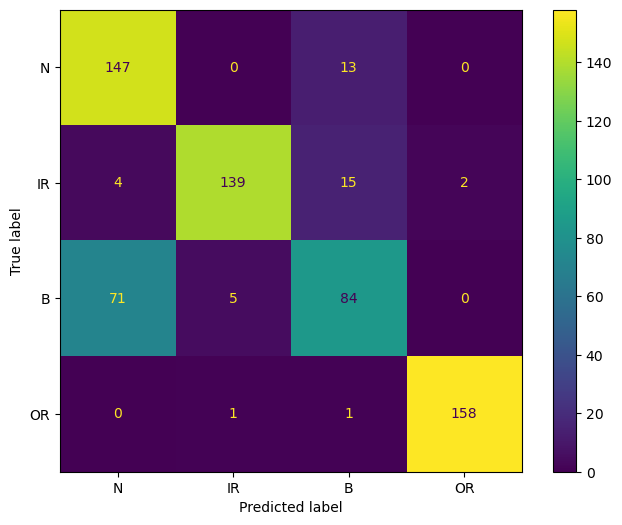

In [7]:
# Validate and Visualize
perfDenseNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
for name in tarData:
        _, TestLoader, _, numClass = loaddata(root_path, name)
        Model = torch.load('./saved_models/DenseNet_'+ name+'.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        perfDenseNet = pd.concat((perfDenseNet, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

### vgg16Net

Validation Accuracy =  98.125
__________________________________________________
Pricision Score = 0.9804639094596251
__________________________________________________
F_1 Score =  0.9803896076441738
__________________________________________________
Recall Score =  0.9804667681380009
__________________________________________________
Response time per batch

 0.6068563461303711
Validation Accuracy =  99.375
__________________________________________________
Pricision Score = 0.9934027777777779
__________________________________________________
F_1 Score =  0.9935103640285503
__________________________________________________
Recall Score =  0.993654214559387
__________________________________________________
Response time per batch

 0.6055142879486084
Validation Accuracy =  98.75
__________________________________________________
Pricision Score = 0.9873496028923661
__________________________________________________
F_1 Score =  0.987348368781543
____________________________________

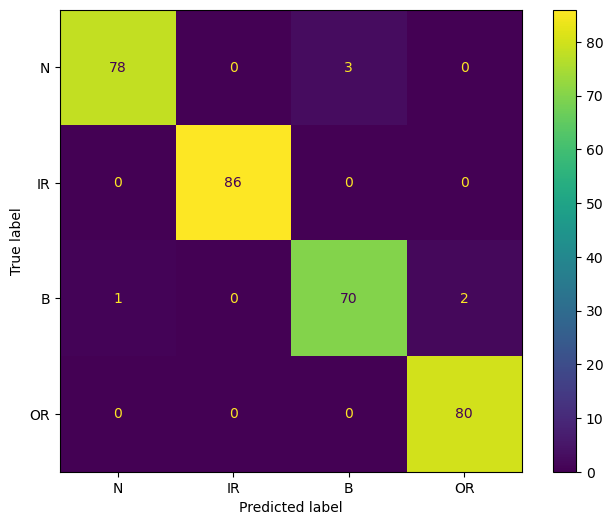

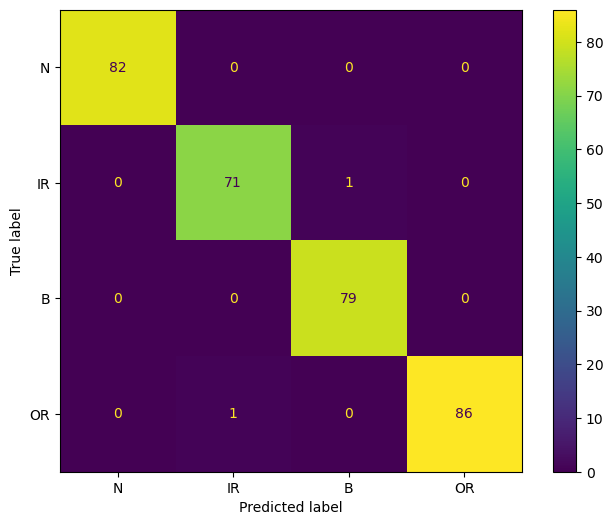

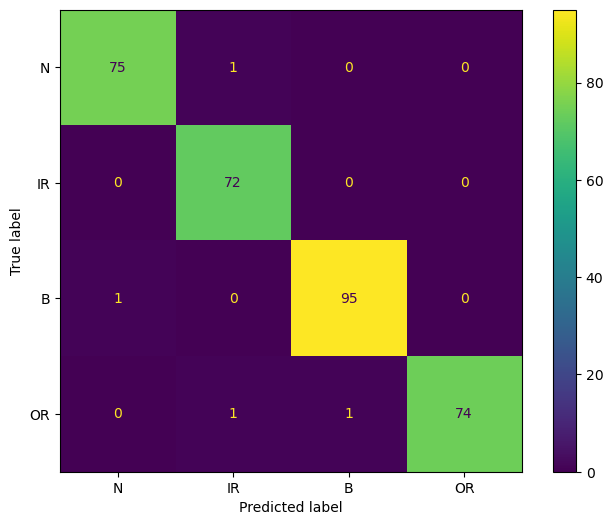

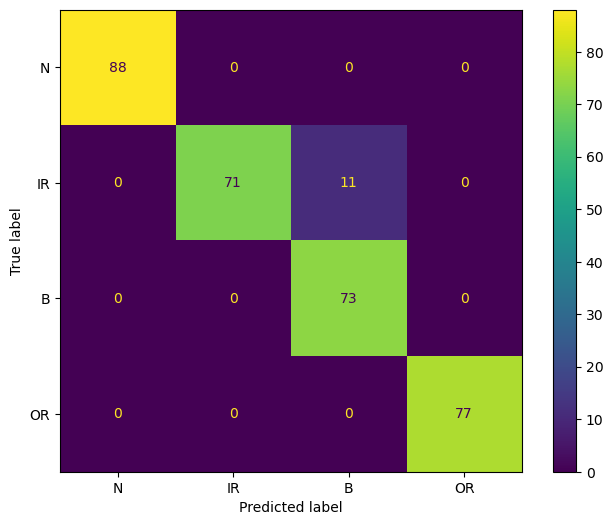

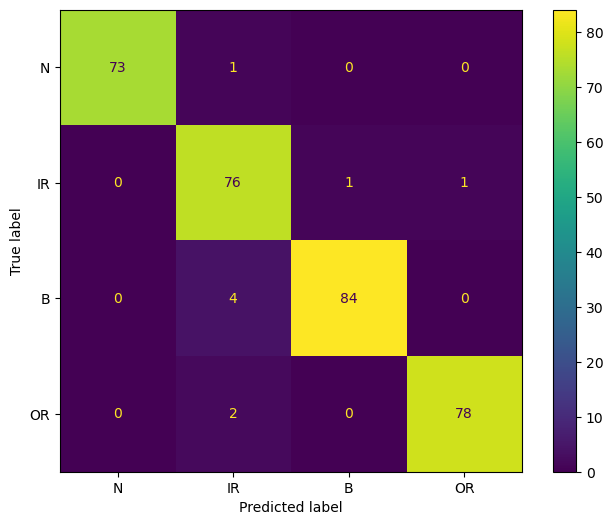

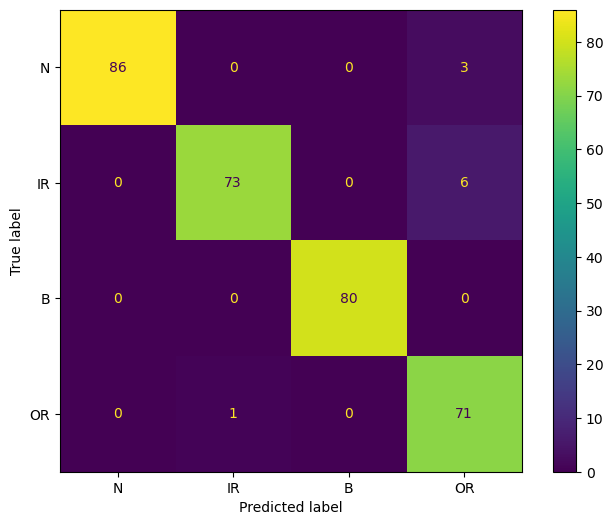

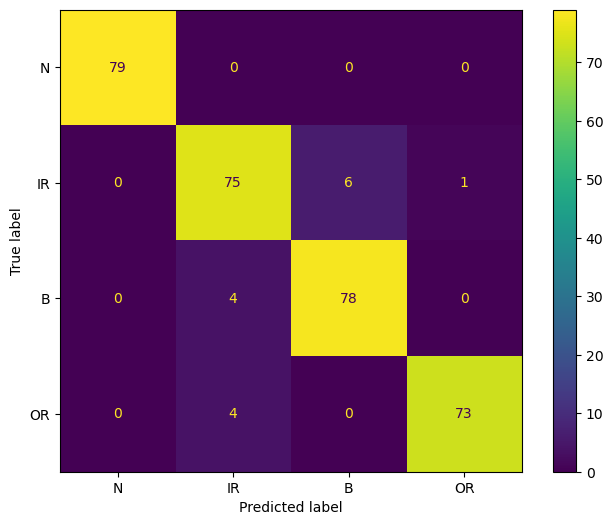

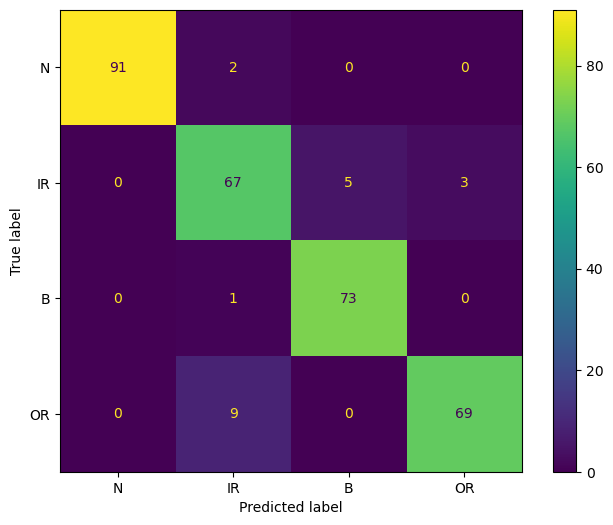

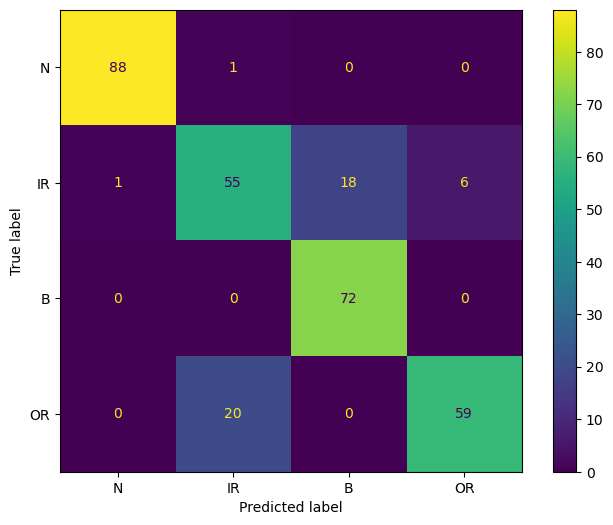

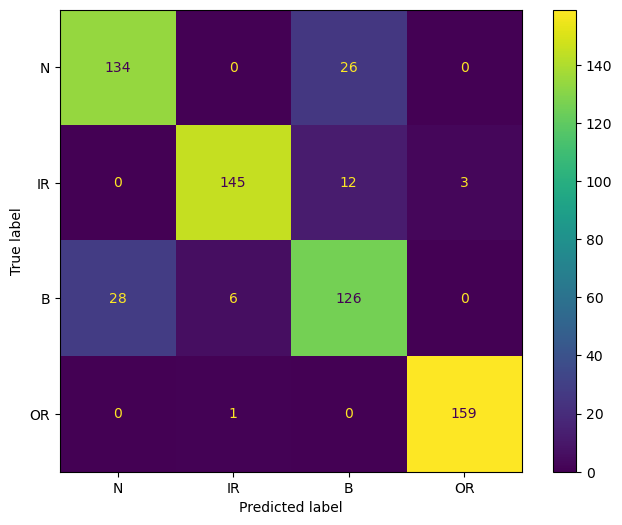

In [8]:
# Validate and Visualize

# Validate and Visualize
perfvgg16Net = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
for name in tarData:
    _, TestLoader, _, numClass = loaddata(root_path, name)
    Model = torch.load('./saved_models/vgg16Net_'+ name +'.pth', map_location=device)
    val_acc, cm, prec, f1, recall, time_batch = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch\n\n', time_batch)
    disp_conf_matrix(cm, class_names)
    perfvgg16Net = pd.concat((perfvgg16Net, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

### GoogleNet

Validation Accuracy =  96.875
__________________________________________________
Pricision Score = 0.9678928414295928
__________________________________________________
F_1 Score =  0.9677105712677821
__________________________________________________
Recall Score =  0.9680439286318282
__________________________________________________
Response time per batch 0.14573073387145996
Validation Accuracy =  98.75
__________________________________________________
Pricision Score = 0.9869335085336075
__________________________________________________
F_1 Score =  0.9870902779228485
__________________________________________________
Recall Score =  0.9873251006353363
__________________________________________________
Response time per batch 0.15712785720825195
Validation Accuracy =  99.375
__________________________________________________
Pricision Score = 0.9932432432432432
__________________________________________________
F_1 Score =  0.9932640841876077
____________________________________

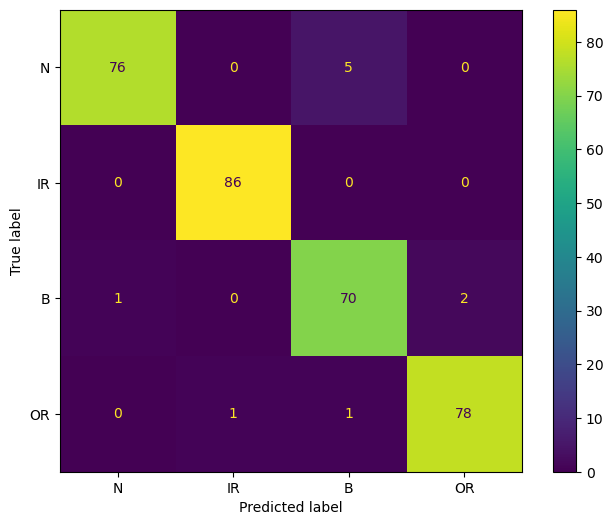

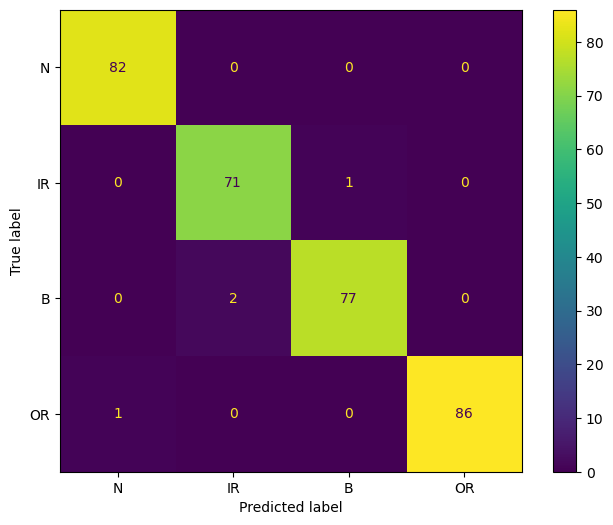

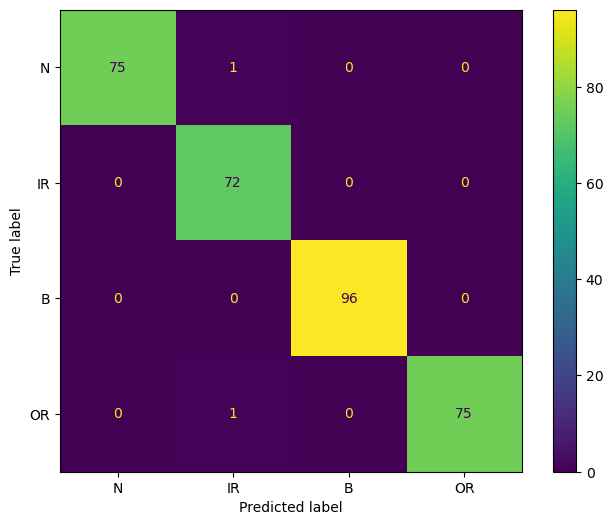

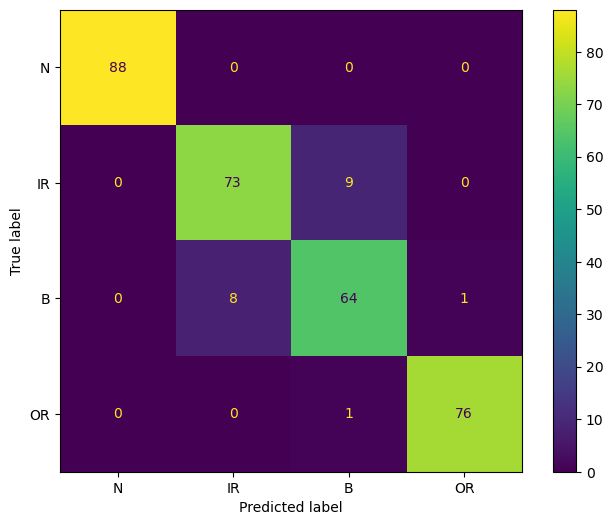

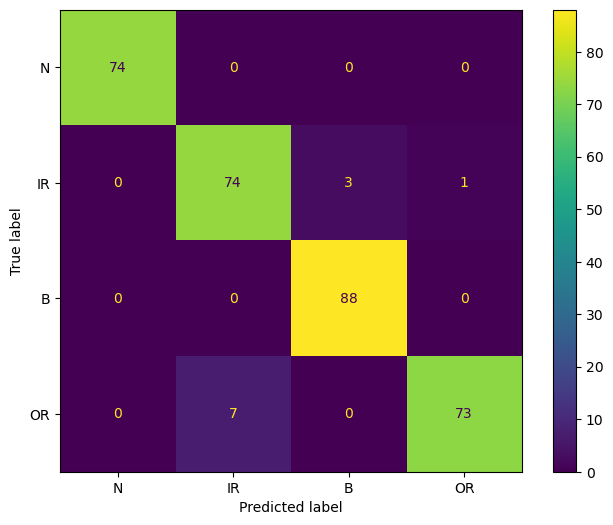

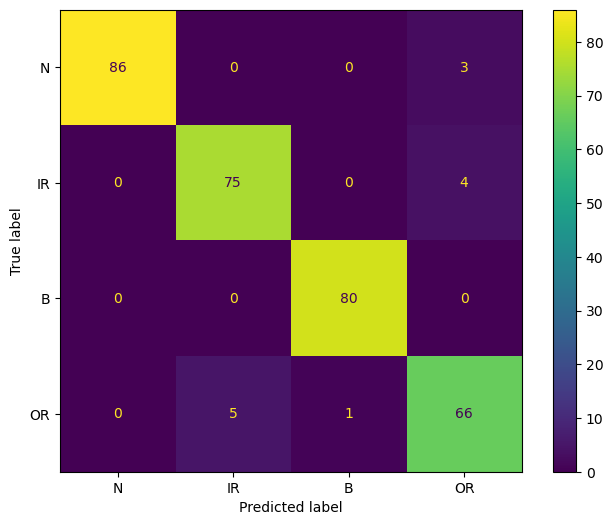

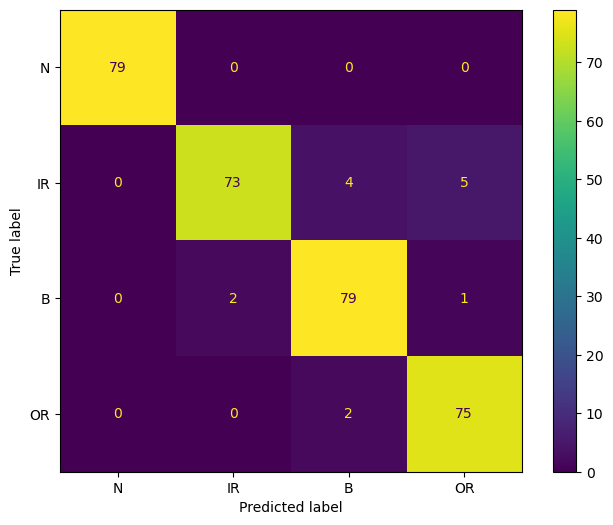

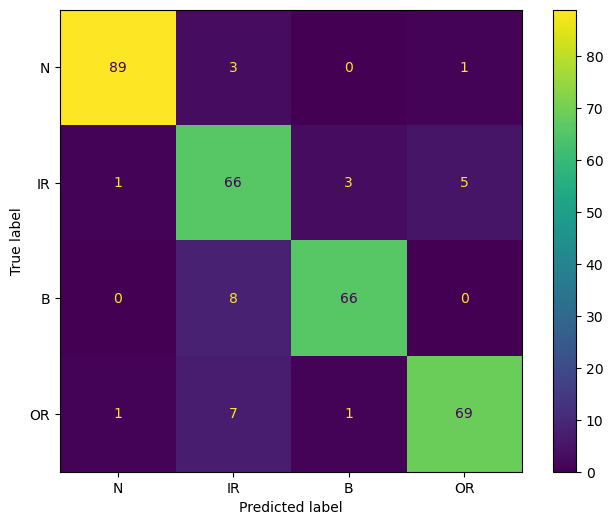

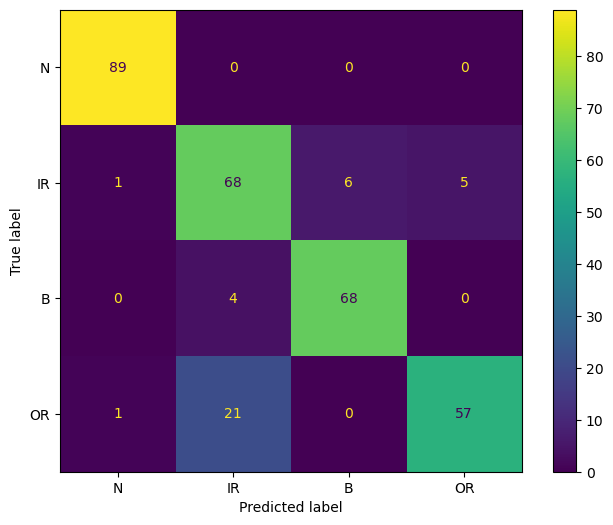

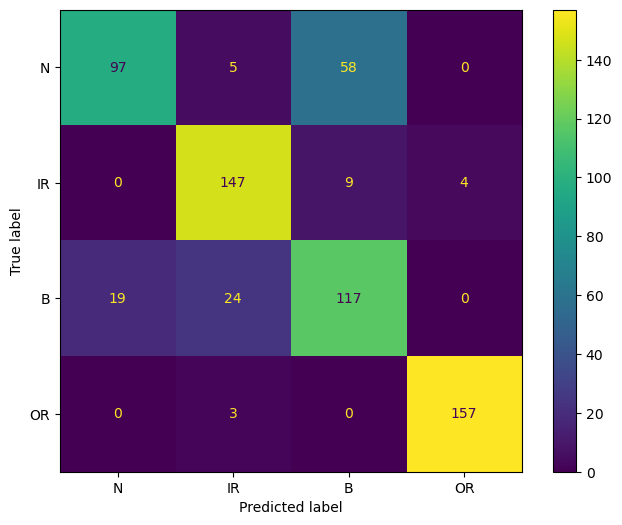

In [9]:
# Validate and Visualize

# Validate and Visualize
perfgoogleNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
for name in tarData:
    _, TestLoader, _, numClass = loaddata(root_path, name)
    Model = torch.load('./saved_models/GoogleNet_'+ name+'.pth', map_location=device)
    val_acc, cm, prec, f1, recall, time_batch = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    perfgoogleNet = pd.concat((perfgoogleNet, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

### SqeezeNet

Validation Accuracy =  97.8125
__________________________________________________
Pricision Score = 0.9776132404181185
__________________________________________________
F_1 Score =  0.9769881712621998
__________________________________________________
Recall Score =  0.9766652925756807
__________________________________________________
Response time per batch 0.0995936393737793
Validation Accuracy =  98.4375
__________________________________________________
Pricision Score = 0.984027121713116
__________________________________________________
F_1 Score =  0.9841506221033439
__________________________________________________
Recall Score =  0.9843920966217519
__________________________________________________
Response time per batch 0.08599996566772461
Validation Accuracy =  97.8125
__________________________________________________
Pricision Score = 0.9777804487179488
__________________________________________________
F_1 Score =  0.9772968846629562
__________________________________

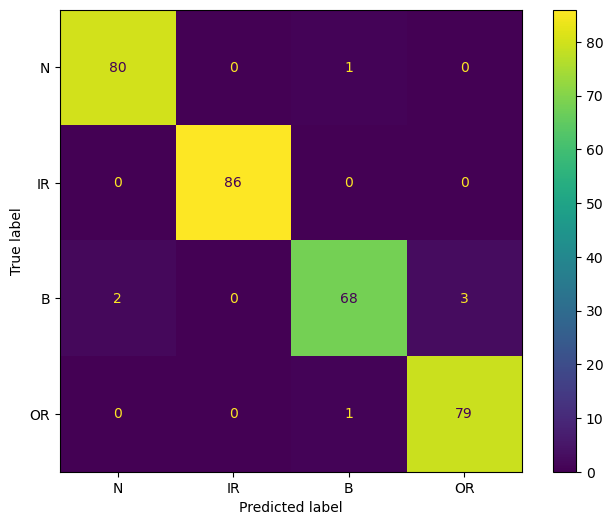

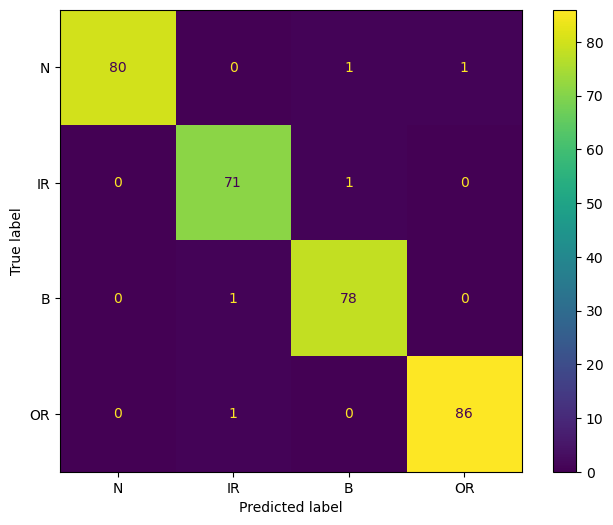

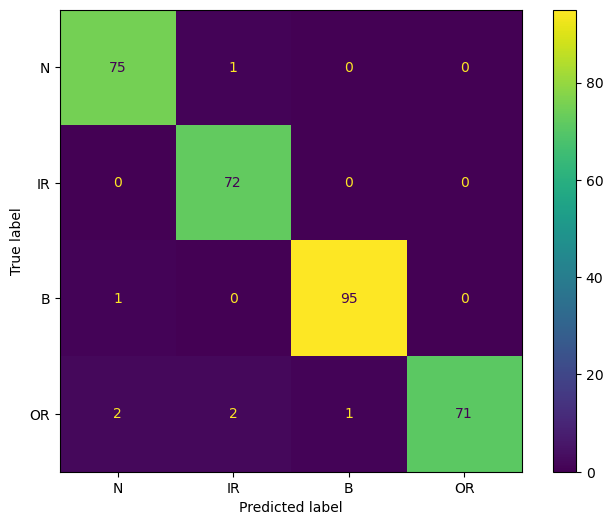

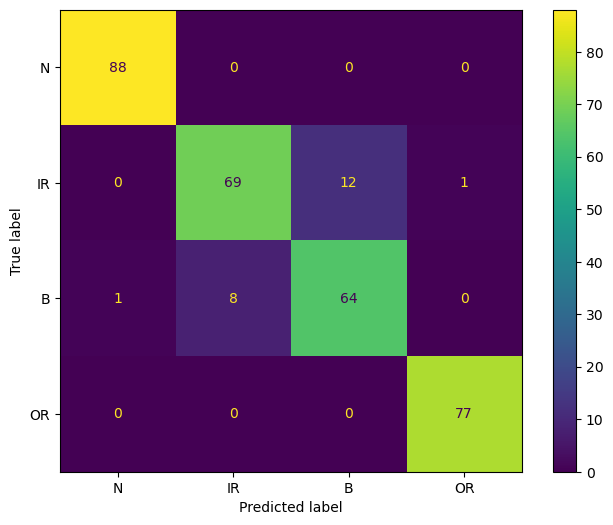

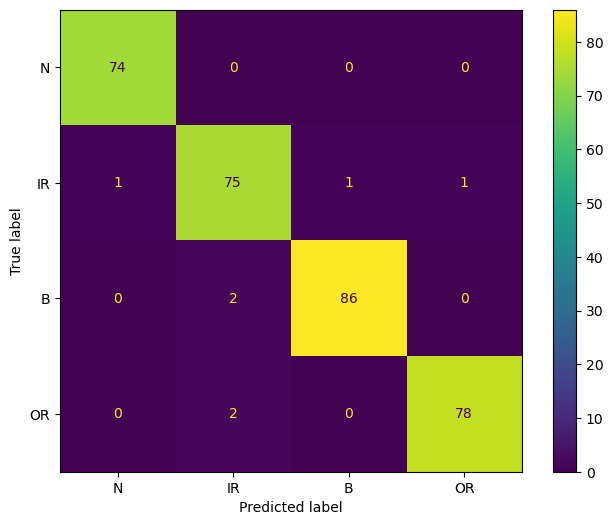

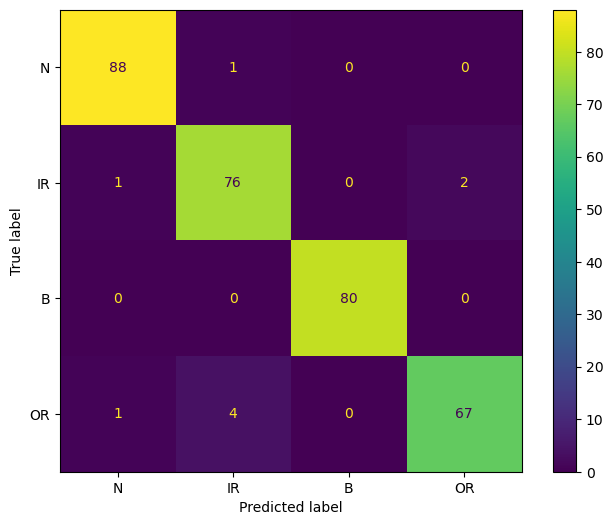

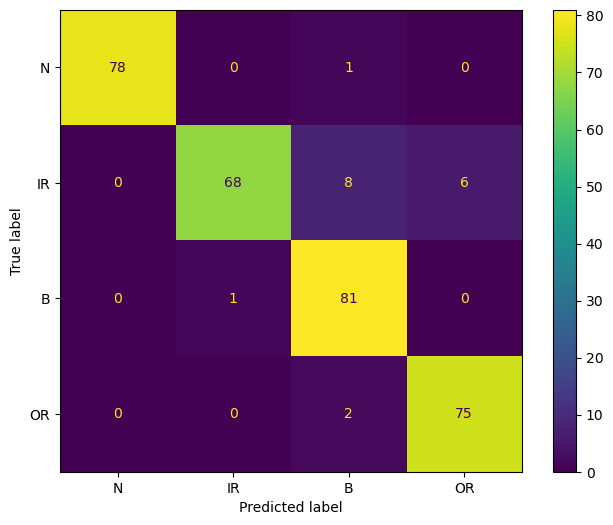

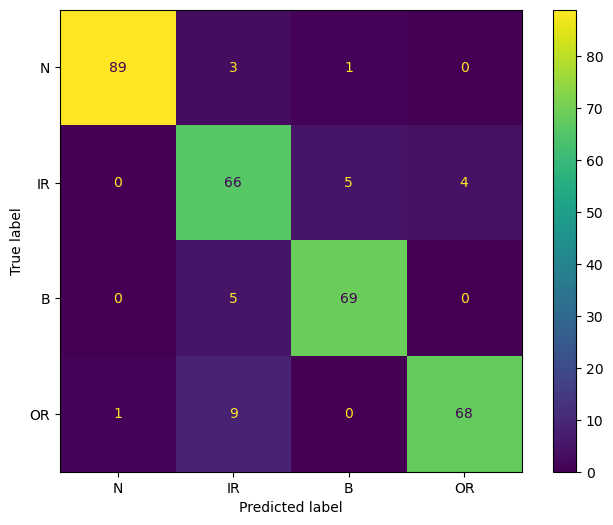

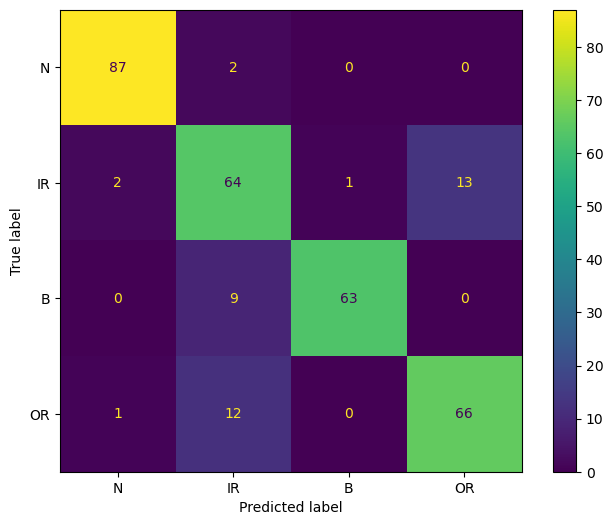

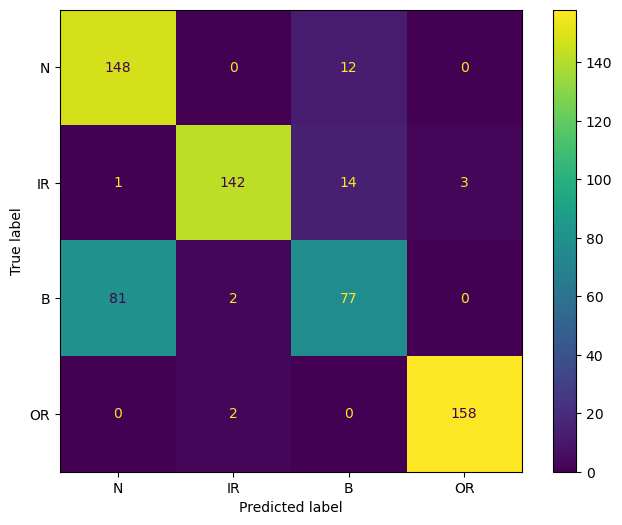

In [10]:
# Validate and Visualize

# Validate and Visualize
perfSqeezeNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
for name in tarData:
    _, TestLoader, _, numClass = loaddata(root_path, name)
    Model = torch.load('./saved_models/SqeezeNet_'+ name +'.pth', map_location=device)
    val_acc, cm, prec, f1, recall, time_batch = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    perfSqeezeNet = pd.concat((perfSqeezeNet, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

Validation Accuracy =  0.990625
__________________________________________________
Pricision Score = 0.9910714285714286
__________________________________________________
F_1 Score =  0.9902097902097903
__________________________________________________
Recall Score =  0.9897260273972602
__________________________________________________
Response time per batch 9.175286531448364
Validation Accuracy =  0.99375
__________________________________________________
Pricision Score = 0.9935632942729823
__________________________________________________
F_1 Score =  0.9937232671607137
__________________________________________________
Recall Score =  0.9939618798195838
__________________________________________________
Response time per batch 9.53945255279541
Validation Accuracy =  0.975
__________________________________________________
Pricision Score = 0.9740350877192983
__________________________________________________
F_1 Score =  0.9742347616901204
______________________________________

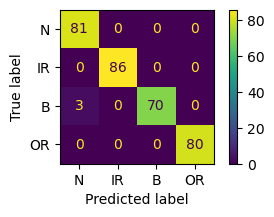

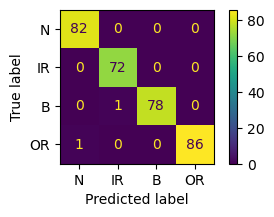

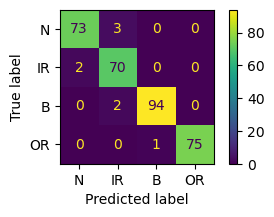

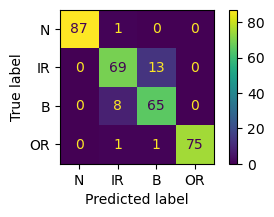

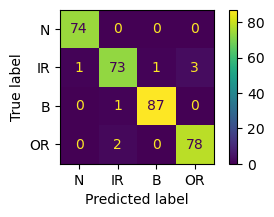

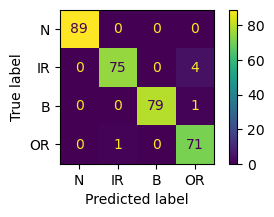

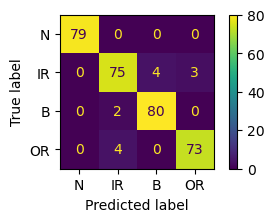

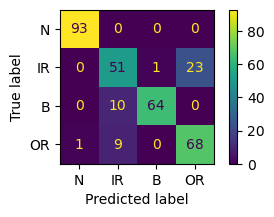

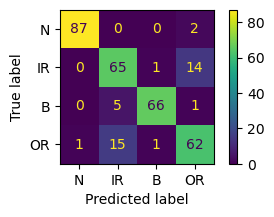

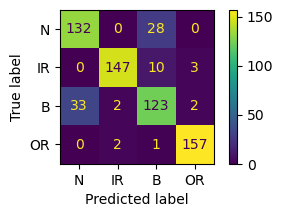

In [10]:
# Train and validate SVM
perfSVM = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_SVM = {}
for name in tarData:
    TrainLoader, TestLoader, _, numClass = loaddata(root_path, name)
    x_train, y_train = getFeatures(TrainLoader)
    model = SVC()
    model.fit(x_train, y_train)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate_svm(model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_SVM[f'pred_labels_{name}'] = tr_labels
    logits_SVM[f'tr_labels_{name}'] = pred_labels
    perfSVM = pd.concat((perfSVM, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/logits_SVM_cwru.mat', logits_SVM)

In [4]:
perfSVM

,0,1,2,3,4,5,6,7,8,9,10
0,Val Acc.,0.990625,0.993750,0.975000,0.925000,0.975000,0.981250,0.959375,0.862500,0.875000,0.873437
1,Precision,0.991071,0.993563,0.974035,0.924051,0.974698,0.980263,0.959708,0.862450,0.877185,0.875476
2,F1_score,0.990210,0.993723,0.974235,0.923383,0.974730,0.980228,0.959587,0.855924,0.874649,0.874194
3,Recall,0.989726,0.993962,0.974689,0.923634,0.974883,0.980745,0.959574,0.854165,0.872876,0.873438


In [8]:
# df = pd.read_csv('./results/all_cwru_ims.csv')
# df.drop('Unnamed: 0', axis = 1, inplace=True)
# df.columns = pd.RangeIndex(start=0, stop=11, step=1)
# df

In [6]:
combPerf = pd.concat((perfSVM, perfSqeezeNet, perfgoogleNet, perfvgg16Net, perfDenseNet, perfResNeXt, perfEffNet, perfvit_pre, perfvit), ignore_index=True, axis=0)
combPerf

,0,1,2,3,4,5,6,7,8,9,10
0,Val Acc.,0.990625,0.993750,0.975000,0.925000,0.975000,0.981250,0.959375,0.862500,0.875000,0.873437
1,Precision,0.991071,0.993563,0.974035,0.924051,0.974698,0.980263,0.959708,0.862450,0.877185,0.875476
2,F1_score,0.990210,0.993723,0.974235,0.923383,0.974730,0.980228,0.959587,0.855924,0.874649,0.874194
3,Recall,0.989726,0.993962,0.974689,0.923634,0.974883,0.980745,0.959574,0.854165,0.872876,0.873438
4,Val Acc.,97.812500,98.437500,97.812500,93.125000,97.812500,97.187500,94.375000,91.250000,87.500000,82.031250
5,Precision,0.977613,0.984027,0.977780,0.928538,0.977970,0.971766,0.947967,0.912129,0.880529,0.836255
6,F1_score,0.976988,0.984151,0.977297,0.928721,0.978173,0.970899,0.943674,0.910240,0.875112,0.814263
7,Recall,0.976665,0.984392,0.977659,0.929544,0.978453,0.970336,0.944610,0.910304,0.871993,0.820312
8,Val Acc.,96.875000,98.750000,99.375000,94.062500,96.562500,95.937500,95.625000,90.625000,88.125000,80.937500
9,Precision,0.967893,0.986934,0.993243,0.938278,0.966775,0.957316,0.957168,0.906648,0.886870,0.817115


In [7]:
combPerf.to_csv('./results/all_cwru_ims.csv')